<a href="https://colab.research.google.com/github/nnguyenu/ML-basic/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extend data 
X = np.concatenate((np.ones(X.shape), X), axis = 0)
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [42]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta = 0.05, tol = 1e-3, max_count = 10000):
    w = [w_init]    
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count % check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return (w,count)
            w.append(w_new)
    return (w,count)

In [50]:
w_init = np.random.randn(X.shape[0], 1)
(w,count) = logistic_sigmoid_regression(X, y, w_init)
print(w[-1],count)
print(sigmoid(np.dot(w[-1].T, X)))

[[-4.09784692]
 [ 1.45399115]] 5200
[[-4.36897283]
 [ 1.21743374]] 10000
[[0.03321896 0.04709477 0.06636872 0.09276282 0.1282121  0.17460116
  0.17460116 0.23328315 0.30441383 0.38630543 0.47517761 0.56565041
  0.65195059 0.7293095  0.84788622 0.88910342 0.92020336 0.94313938
  0.95977109 0.98014227]]


(10,)


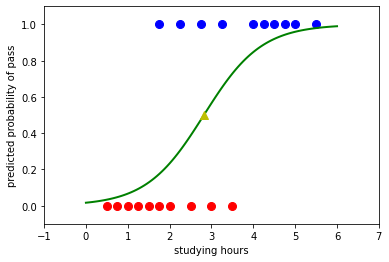

In [99]:
# get X[0] val of index where y[index] = 0
# we can write: X0 = [1, X[np.where(y==0)]][0]
X0 = []
for i in range(X.shape[1]):
  if y[i] == 0:
    X0.append(X[1][i])
X0 = np.array(X0)

y0 = y[np.where(y == 0)]

X1 = []
for i in range(X.shape[1]):
  if y[i] == 1:
    X1.append(X[1][i])
X1 = np.array(X1)

y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bo', markersize = 8)

xx = np.linspace(0, 6, 100)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
# threshold * w1 + w0 = 0 -> e^s = e^0 = 1 -> sigmoid(s) = 0.5
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)

plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.axis([-1,7,-0.1,1.1])
plt.show()